In [1]:
dataset_weather = "usa_rain_prediction_dataset_2024_2025.csv"

Training Accuracy: 0.9045729919874926
Validation Accuracy: 0.9051527587779298
Testing Accuracy: 0.9052439580483356


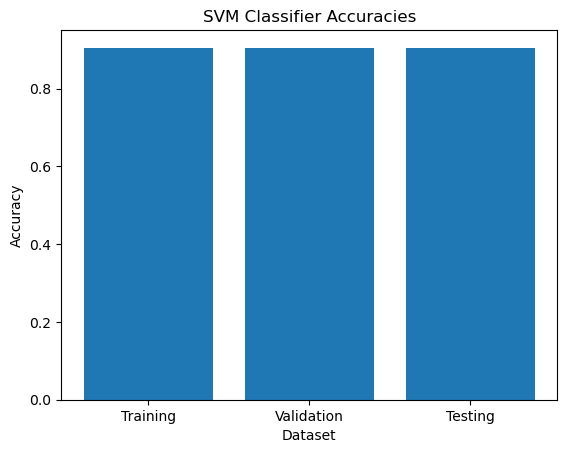

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

dataset_weather = "usa_rain_prediction_dataset_2024_2025.csv"

# Load the dataset
df = pd.read_csv(dataset_weather)

# Assuming 'Rainfall' is the target variable
# and other columns are features
X = df.drop(['Rain Tomorrow'], axis=1)  # Features
y = df['Rain Tomorrow']  # Target

# Convert 'Date' and 'Location' to numerical representations using Label Encoding
for column in ['Date', 'Location']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can experiment with different kernels (linear, rbf, poly)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = svm_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the validation set
y_val_pred = svm_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Make predictions on the test set
y_test_pred = svm_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Testing Accuracy:", test_accuracy)

# Create a list of accuracies for plotting
accuracies = [train_accuracy, val_accuracy, test_accuracy]
labels = ['Training', 'Validation', 'Testing']

# Plot the accuracies
plt.bar(labels, accuracies)
plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.title("SVM Classifier Accuracies")
plt.show()

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9052439580483356
Precision: 0.9025019333774965
Recall: 0.9052439580483356
F1-score: 0.9018090856938836


In [6]:
user_input = {}
for column in X.columns:
  if column != 'Rain Tomorrow':  # Assuming 'Rain Tomorrow' is your target variable
    if column == 'Date' or column == 'Location' :
      user_input[column] = input(f"Enter the {column} (numeric): ")

    else:
      user_input[column] = input(f"Enter the {column}: ")

# Convert user input to a DataFrame
user_df = pd.DataFrame([user_input])

# Convert 'Date' and 'Location' to numerical representations using Label Encoding
for column in ['Date', 'Location']:
  le = LabelEncoder()
  user_df[column] = le.fit_transform(user_df[column])

# Make a prediction using the trained SVM model
prediction = svm_classifier.predict(user_df)

# Print the prediction
if prediction[0] == 'Yes':
  print("It will rain tomorrow.")
else:
  print("It will not rain tomorrow.")

Enter the Date (numeric):  12/5/2025
Enter the Location (numeric):  New York
Enter the Temperature:  234
Enter the Humidity:  654
Enter the Wind Speed:  21
Enter the Precipitation:  67
Enter the Cloud Cover:  234
Enter the Pressure:  12


It will not rain tomorrow.
